### Data Augmentation To Address Overfitting In Flower Classification `CNN`

- By default `CNN` is not scaled or rotation invariate. It means if we try to classify roses and tulips, and the training set contains proper images of these two flowers. After training the `CNN` when we supply a rotated image of a rose for the classification, the `CNN` model may not perform better.
- To handle this problem we use a technique called **Data Augmentation**.
- In **Data Augmentation** from the existing training sample we try to generate new samples like in below image, 4 new training samples are generated from original sample using different transformations:

<img src="images/cnn/flip.png" width=800>

- In this notebook we will build a `CNN` to classify flower images. We will also see how our model overfits and how overfitting can be addressed using **Data Augmentation**. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc.
- Here we will use tensorflow's flower dataset for this practice.
- Link: https://www.tensorflow.org/tutorials/images/classification


<hr style="border:2px solid black">

In [2]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

**Notes:**

- Here we are using `PIL` which is an image library in `Python`.
- Also we need to use the `cv2` so first install `opencv` library using following command.
> `!pip3 install opencv-python`
- Here first of all we need to download the flower dataset from google website.
- The tensorflow has the function `get_file()` through which we can download the dataset from the url.
- We are getting the dataset in a folder named `flower_photos`.
- The `cache_dir` indicates where to download the dataset. We will download it in the present working directory so we use `.`.
- `untar=True` will unzip it as the datset is a zip file.

<hr style="border:2px solid black">

In [4]:
# Downloading flower dataset from google website

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 28s 0us/step


In [5]:
# Checking the directory where we store the image dataset

data_dir

'.\\datasets\\flower_photos'

**Notes:**

- Here in the directory we can see we have `5` types of different flower photos.
- Now we will convert this data directory to a `pathlib`. For this we will use a module named `pathlib`.
- This will allow us to do certain things in a easier way. That is when we go through these flower images and maked them `numpy` array then this `pathlib` will be very usefull.
- In `pathlib` it will make the path to a `WindowsPath` object.

<hr style="border:2px solid black">

In [6]:
# Converting the data directory to a "pathlib"

import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [9]:
# Usage of pathlib:
# Now we can get all the images that has an extension of ".jpg"
# For this we will use the "glob()"

image_count = list(data_dir.glob('*/*.jpg'))
print("The total number of images in the dataset with a '.jpg' extension is: ",len(image_count))

The total number of images in the dataset with a '.jpg' extension is:  3670


In [10]:
# Now if we want to see only the images of roses
# There also this "glob()" is very useful

roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

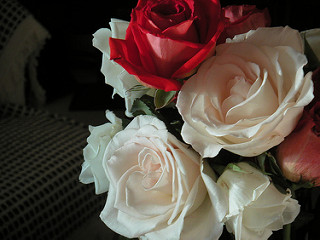

In [11]:
# Let's see the images using the PIL module
# Here we will see the indexed 1 rose image

PIL.Image.open(str(roses[1]))

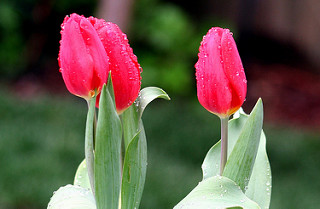

In [12]:
# Checking tulip's image

tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

**Read flowers images from disk into numpy array using opencv**

- Here we will create a dictionary of different flowers as there class names are the `keys`, and the path for all the images of that kind as `values`.
- Then we will also create a labels dictionary to assign a class number to each of the flower types.
- Then we will use the `cv2` module to read these image files into `opencv` objects.
- The `opencv` module has a method named `imread()` to do this. Here we need to supply the filepath and in return it will provide a `numpy` array.
- Also remember we need to wrap the filepath in `str` to change it from the `WindowsPath` object to a sting, so `cv2` is able to read it.

<hr style="border:2px solid black">

In [13]:
# Creating dictionary

flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [14]:
# Creating label dictionary

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [15]:
# Getting the file path of the 1st rose image

flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [16]:
# Creating a sting of the WindowsPath object

str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [17]:
# Now creating the numpy array of the path using opencv

img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [18]:
# So opencv just read the image from the path and convert it into 3d numpy array

img.shape

(240, 179, 3)

In [19]:
# opencv also has a function to resize the images.
# As the images in the folder are of different dimensions, so we need to make them uniform.
# As here we resizing the current image.

cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [20]:
# Creating a for loop to resize all the images to same dimension and store them in different lists.
# Here in 'y' we need the numbers for each of the flowers so we need to use the "flowers_labels_dict[flower_name]"

X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [23]:
# Checking the variables
# X is a simple 3d array

X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [22]:
y[:5]

[0, 0, 0, 0, 0]

In [24]:
# Now converting them into simple numpy arrays for convenience

X = np.array(X)
y = np.array(y)

### Train test split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.shape, X_test.shape

((2752, 180, 180, 3), (918, 180, 180, 3))

### Preprocessing: scale images

In [26]:
# Scaled them between 0 and 1 

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### Build convolutional neural network and train it

- Here we will have multiple convolutional and padding network.
- In `Conv2D(16, 3, padding='same', activation='relu')` `16` means we have `16` filters and `3` means each filter will have a size of `3X3`. Padding is `same` means we need to apply padding in such a way so the output **featuremap** will have same number of pixels as the input. The Activation Function is `relu`.
- The `Flatten()` is used to flatten the values as the `dense` network will accept only `1d` arrays.
- The `Dense()` to create a dense networks. Here we have one hidden layer with `128` neurons and one output layer with `5` neurons/classes as we have `5` types of flowers. Here for output we are not having any Activation Function. So by default it will apply the `linear` activation.
- In compilation we are using `Adam` as optimizer.
- We are usning `SparseCategoricalCrossentropy` as loss because the output has values in a range between `0` to `4`.
- Here we are running the model for `30` epochs.

<hr style="border:2px solid black">

In [27]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)     

Epoch 1/30
86/86 [==============================] - 64s 684ms/step - loss: 1.3203 - accuracy: 0.4419
Epoch 2/30
86/86 [==============================] - 67s 783ms/step - loss: 1.0061 - accuracy: 0.6025
Epoch 3/30
86/86 [==============================] - 74s 860ms/step - loss: 0.8406 - accuracy: 0.6784
Epoch 4/30
86/86 [==============================] - 60s 693ms/step - loss: 0.6112 - accuracy: 0.7707
Epoch 5/30
86/86 [==============================] - 57s 660ms/step - loss: 0.4046 - accuracy: 0.8568
Epoch 6/30
86/86 [==============================] - 57s 667ms/step - loss: 0.2177 - accuracy: 0.9288
Epoch 7/30
86/86 [==============================] - 57s 669ms/step - loss: 0.1202 - accuracy: 0.9669
Epoch 8/30
86/86 [==============================] - 58s 672ms/step - loss: 0.0771 - accuracy: 0.9775
Epoch 9/30
86/86 [==============================] - 59s 684ms/step - loss: 0.0472 - accuracy: 0.9884
Epoch 10/30
86/86 [==============================] - 58s 674ms/step - loss: 0.0245 - accura

In [28]:
# To evaluate the model on the test dataset

model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 5s 158ms/step - loss: 2.3982 - accuracy: 0.6765


[2.3982021808624268, 0.6764705777168274]

**Notes:**

- So we can see that in during training we got an accuracy of `99%` but in test dataset we only got an accuracy of `67%`.
- So it is an **Overfitting** situation.

<hr style="border:2px solid black">

In [29]:
# To do the predictions
# As by default "linear" activation got apllied so we get values all around the places

predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 5s 172ms/step


array([[  4.779752  ,  29.513771  ,  -3.1196537 , -14.370509  ,
          0.80800575],
       [  7.9130764 ,   1.1900173 ,  -9.1906    ,  -0.9957859 ,
         10.807258  ],
       [ -4.3530025 ,   7.027193  ,  13.631044  ,  -4.768665  ,
         -5.3381753 ],
       ...,
       [  5.395241  ,  -3.8926413 ,  -6.4704885 ,   1.7922162 ,
          4.153578  ],
       [  4.479376  ,   3.3761039 ,  -0.13017815,   0.1527315 ,
         -3.7823584 ],
       [ -3.319867  , -18.583788  ,  -0.67074925,   7.8093143 ,
          4.9885955 ]], dtype=float32)

In [30]:
# Converting the array to a probability score
# Here we are taking the 1st array i.e. 0th index
# We get a tensor as a result which ranges between 0 and 1.

score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.8119719e-11, 1.0000000e+00, 6.7217833e-15, 8.7357226e-20,
       3.4138526e-13], dtype=float32)>

In [31]:
# Now checking the maximum value in that score 

np.argmax(score)

1

In [32]:
# Checking it with the test dataset for the 0th index

y_test[0]

1

- `1` is for `daisy` flower.

### Improve Test Accuracy Using Data Augmentation

- For link: https://www.tensorflow.org/tutorials/images/data_augmentation
- For link: https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomZoom

<hr style="border:2px solid black">

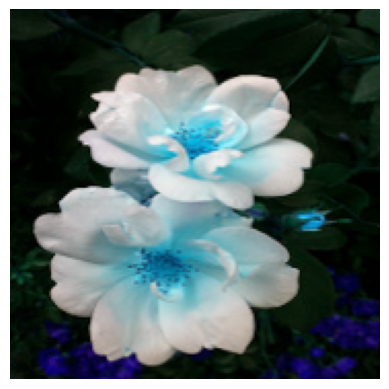

In [33]:
# Plotting the 1st image from the original dataset

plt.axis('off')
plt.imshow(X[0])
plt.show()

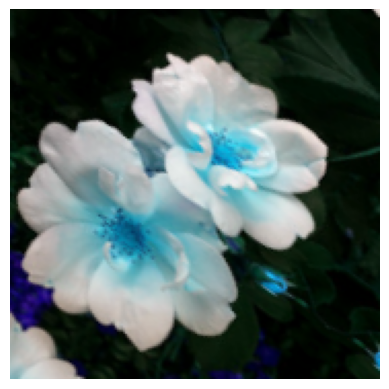

In [35]:
# Applying transformation
# We can use the data_augmentation as a function
# It takes 2d array
# Here we are using rotated image

data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1),])

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))
plt.show()

In [40]:
# Now creating new samples using the original dataset
# Here we will have variety of transformations that are flipped, rotated and zoomed

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip(),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

#### Train the model using data augmentation and a drop out layer

In [41]:
# Now again training the model
# Here we will pass the data augmentation as the 1st layer
# Also we will create a dropout layer to drop 20% neurons at random at each pass

num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 84s 878ms/step - loss: 1.1922 - accuracy: 0.4971
Epoch 2/30
86/86 [==============================] - 78s 910ms/step - loss: 1.0011 - accuracy: 0.6032
Epoch 3/30
86/86 [==============================] - 91s 1s/step - loss: 0.9072 - accuracy: 0.6432
Epoch 4/30
86/86 [==============================] - 101s 1s/step - loss: 0.8176 - accuracy: 0.6882
Epoch 5/30
86/86 [==============================] - 86s 995ms/step - loss: 0.7857 - accuracy: 0.7002
Epoch 6/30
86/86 [==============================] - 93s 1s/step - loss: 0.7080 - accuracy: 0.7224
Epoch 7/30
86/86 [==============================] - 81s 938ms/step - loss: 0.6470 - accuracy: 0.7569
Epoch 8/30
86/86 [==============================] - 94s 1s/step - loss: 0.6358 - accuracy: 0.7580
Epoch 9/30
86/86 [==============================] - 97s 1s/step - loss: 0.5757 - accuracy: 0.7809
Epoch 10/30
86/86 [==============================] - 90s 1s/step - loss: 0.5276 - accuracy: 0.8023
Epoch 

In [42]:
# Again doing evaluation using the test dataset

model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 5s 157ms/step - loss: 1.4366 - accuracy: 0.7309


[1.4365975856781006, 0.7309368252754211]

**Notes:**

- Now we can see that the training set has a accuracy of `95%` and the test dataset has a accuracy of `73%`.
- So the accuracy of the test dataset has increased from `67%` to `73%`.